<a href="https://colab.research.google.com/github/abhinav-exp/ELM_Implementaion/blob/main/ELM_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EML** : *Moore-Penrose pseudoinverse vs JAYA vs TAO vs HHO*

---



## Common processes for all Moore-Penrose pseudoinverse, JAYA, TAO, HHO

###Importing All the neccessary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Data Collection

In [77]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

            CBBTCUSD
DATE                
2017-06-18   2515.25
2017-06-19   2596.98
2017-06-20   2725.08
2017-06-21   2643.35
2017-06-22   2679.99
...              ...
2019-08-03  10820.75
2019-08-04  10997.82
2019-08-05  11775.14
2019-08-06  11440.08
2019-08-07  12014.41

[781 rows x 1 columns]


### Normalisation of Data

In [78]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

            CBBTCUSD
DATE                
2017-06-18  0.034073
2017-06-19  0.038680
2017-06-20  0.045901
2017-06-21  0.041294
2017-06-22  0.043360
...              ...
2019-08-03  0.502247
2019-08-04  0.512228
2019-08-05  0.556045
2019-08-06  0.537158
2019-08-07  0.569532

[781 rows x 1 columns]


In [79]:
denormalize = lambda x: (x)*np.float64(data1max - data1min + 2) + np.float64(data1min - 1)

### Sequence Convertion

In [80]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x)
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(771, 10)
            0         1         2         3         4         5         6  \
0    0.034073  0.038680  0.045901  0.041294  0.043360  0.043967  0.037432   
1    0.038680  0.045901  0.041294  0.043360  0.043967  0.037432  0.033530   
2    0.045901  0.041294  0.043360  0.043967  0.037432  0.033530  0.028023   
3    0.041294  0.043360  0.043967  0.037432  0.033530  0.028023  0.037484   
4    0.043360  0.043967  0.037432  0.033530  0.028023  0.037484  0.036208   
..        ...       ...       ...       ...       ...       ...       ...   
766  0.441959  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307   
767  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562   
768  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501   
769  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030   
770  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030  0.502247   

            7         8         9  
0    0.033530  0.028023  0.03

### Training and Testing Split

In [81]:
train_x = data3.iloc[:int(0.85*len(data3)), :-1]
train_y = data3.iloc[:int(0.85*len(data3)), -1:]
test_x = data3.iloc[int(0.85*len(data3)):, :-1]
test_y = data3.iloc[int(0.85*len(data3)):, -1:]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(655, 9)
(655, 1)
(116, 9)
(116, 1)


## Moore-Penrose pseudoinverse

### Implementing the model

In [82]:
class ELM(object):
    def __init__(self, inputSize, outputSize, hiddenSize):
        self.inputSize = inputSize
        self.outputSize = outputSize
        self.hiddenSize = hiddenSize
        self.weight = np.matrix(np.random.uniform(-0.5, 0.5, (self.hiddenSize, self.inputSize)))
        self.bias = np.matrix(np.random.uniform(0, 1, (1, self.hiddenSize)))
        self.H = 0
        self.beta = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def predict(self, X):
        X = np.matrix(X)
        y = self.sigmoid((X * self.weight.T) + self.bias) * self.beta
        return y

    def train(self, X, y):
        X = np.matrix(X)
        y = np.matrix(y)
        self.H = (X * self.weight.T) + self.bias
        self.H = self.sigmoid(self.H)
        H_moore_penrose = np.linalg.inv(self.H.T * self.H) * self.H.T
        self.beta = H_moore_penrose * y
        return self.H * self.beta

In [83]:
elm = ELM(9, 1, 10)
elm.train(train_x,train_y)
pred_y_MPP = elm.predict(test_x)

### Prediction

In [84]:
pred_y_MPP[:, 0]

matrix([[0.18125358],
        [0.17408715],
        [0.1861219 ],
        [0.17090448],
        [0.19359062],
        [0.18199538],
        [0.19608125],
        [0.1896533 ],
        [0.19668312],
        [0.18875685],
        [0.20011166],
        [0.20375378],
        [0.19993789],
        [0.18244174],
        [0.18554603],
        [0.17980933],
        [0.18245554],
        [0.18268934],
        [0.19185842],
        [0.19112465],
        [0.2009537 ],
        [0.21432447],
        [0.21931531],
        [0.21761537],
        [0.21667664],
        [0.2176721 ],
        [0.22770564],
        [0.24116621],
        [0.25295376],
        [0.30743827],
        [0.28401064],
        [0.35348173],
        [0.33788425],
        [0.37033388],
        [0.32950121],
        [0.32103227],
        [0.28966742],
        [0.36044823],
        [0.3300291 ],
        [0.35511121],
        [0.32059586],
        [0.34449136],
        [0.33353392],
        [0.35862469],
        [0.38427524],
        [0

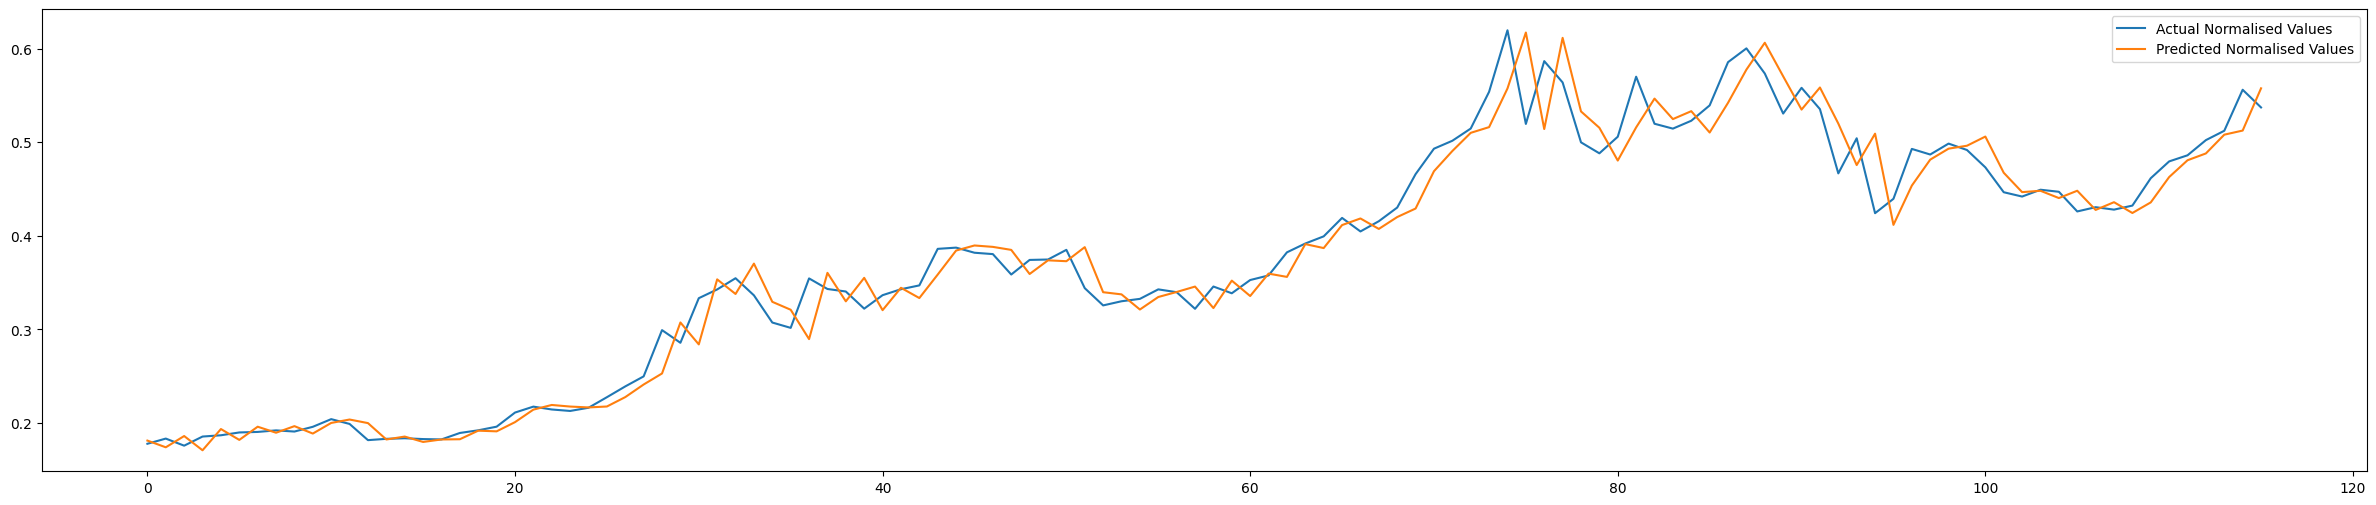

In [85]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(pred_y_MPP)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [86]:
denormalized_preds_MPP = denormalize(pred_y_MPP)
# print(denormalized_preds)
preds1_MPP = pd.DataFrame(denormalized_preds_MPP)
preds1_MPP['DATE'] = data1.index[-1*len(preds1_MPP):]
preds1_MPP = preds1_MPP.set_index('DATE')
print(preds1_MPP)

                       0
DATE                    
2019-04-14   5126.260176
2019-04-15   4999.126166
2019-04-16   5212.625389
2019-04-17   4942.664813
2019-04-18   5345.122056
...                  ...
2019-08-03  10439.110547
2019-08-04  10568.411254
2019-08-05  10924.008026
2019-08-06  11001.865417
2019-08-07  11802.367493

[116 rows x 1 columns]


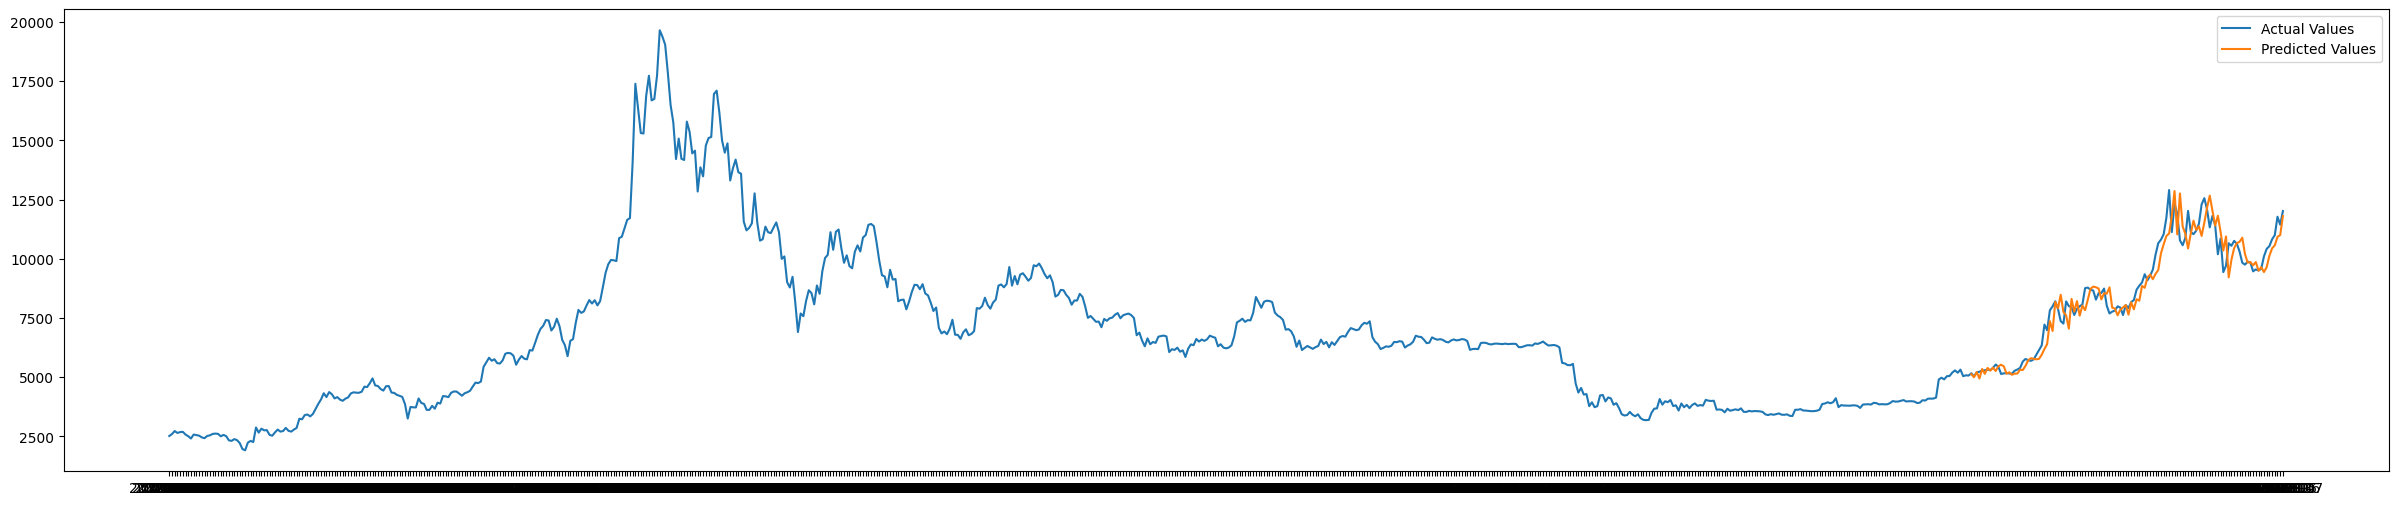

In [87]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [88]:
mse_MPP = np.mean((np.array(preds1_MPP[0]) - np.array(data1.iloc[-1*(len(preds1_MPP)):, 0]))**2)
print("mse  "+ str(mse_MPP))
print("rmse "+ str(np.sqrt(mse_MPP)))

mse  374484.51009461185
rmse 611.9513952060341


In [89]:
np.array(test_y - pred_y_MPP)[:, 0]

array([-3.38440800e-03,  9.30900186e-03, -1.02949843e-02,  1.46692116e-02,
       -6.65842865e-03,  7.95199201e-03, -5.57752087e-03,  2.51501331e-03,
       -5.76902268e-03,  7.22820538e-03,  4.05536270e-03, -4.70788301e-03,
       -1.82023684e-02,  6.86098059e-04, -1.79305762e-03,  3.06428244e-03,
        3.75810221e-05,  6.70561221e-03,  3.80916763e-04,  4.99626004e-03,
        1.02397242e-02,  3.21667863e-03, -4.82654705e-03, -4.70268885e-03,
       -3.50808650e-04,  9.92528320e-03,  1.14293615e-02,  8.68173466e-03,
        4.63191349e-02, -2.17046568e-02,  4.93644067e-02, -1.07499837e-02,
        1.68202806e-02, -3.39132177e-02, -2.21258245e-02, -1.93665058e-02,
        6.48499646e-02, -1.72305798e-02,  1.04918473e-02, -3.29226045e-02,
        1.59950442e-02, -1.53639163e-03,  1.35094957e-02,  2.74610611e-02,
        3.11940327e-03, -7.74996082e-03, -7.72032074e-03, -2.63230262e-02,
        1.50252984e-02,  8.74136139e-04,  1.21325980e-02, -4.38291231e-02,
       -1.40989553e-02, -

In [90]:
err_test_MPP = np.array(test_y - pred_y_MPP)[:, 0]
mse_test_MPP = np.mean(err_test_MPP ** 2)
rmse_test_MPP = np.sqrt(mse_test_MPP)
mae_test_MPP = np.mean(np.abs(err_test_MPP))
mape_test_MPP = np.mean(np.abs(err_test_MPP) / np.array(test_y)[:, 0])
MPPN = pd.DataFrame([[mse_test_MPP, rmse_test_MPP, mae_test_MPP, mape_test_MPP]], columns = ["mse", "rmse", "mae", "mape"], index = ['MPPN'])
MPPN

,mse,rmse,mae,mape
MPPN,0.000682,0.026107,0.018745,0.047181


## Jaya Optimisation

### Implementing the model

In [91]:
class JAYA_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.best = np.argmin(self.mse)
    self.worst = np.argmax(self.mse)
    self.best_error_graph = np.array([np.sum(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    # print("x", X.shape)
    # print("w", weight.shape)
    a = np.matmul(X, weight)
    # print("h", a.shape)
    # print("b", bias.shape)
    # print(len(bias.shape))
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    # print("c", c.shape)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def optimise(self, gen):
    for i in range(gen):
      r0 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      r1 = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta
      new_beta += r0 * (self.beta[self.best] - self.beta)
      new_beta -= r1 * (self.beta[self.worst] - self.beta)
      new_pred = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
      new_error = (new_pred - self.train_py) ** 2
      new_mse = np.mean(new_error, axis = 1)
      cond = new_mse < self.mse
      self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
      self.mse = np.where(cond, new_mse, self.mse)
      self.best = np.argmin(self.mse)
      self.worst = np.argmax(self.mse)
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.sum(self.mse)]))



### Convergence Curve

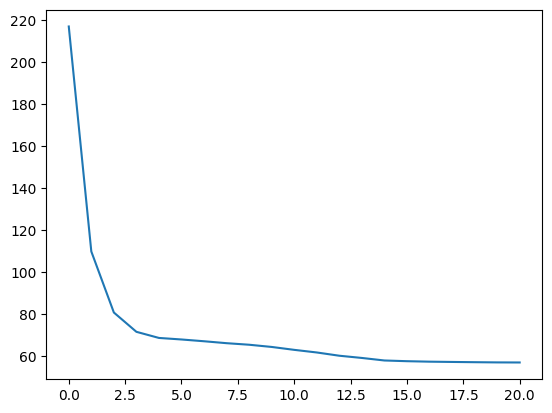

In [92]:
optimiser = JAYA_ELM(2000)
optimiser.optimise(20)
ec_Jaya = optimiser.best_error_graph
plt.plot(ec_Jaya)
preds_train_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best],  train_x)


In [93]:
print(preds_train_Jaya.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Jaya = (np.array(train_y)[:, 0] - np.array(preds_train_Jaya)[:, 0])
# print(error_train)
print(np.mean((error_train_Jaya) ** 2))

(655, 1)
0.0014552957844530688


### Prediction

In [94]:
preds_Jaya = optimiser.forward_function(optimiser.weight[optimiser.best], optimiser.bias[optimiser.best], optimiser.beta[optimiser.best], test_x)
print(preds_Jaya.shape)
error_test_Jaya = (np.array(test_y)[:, 0] - np.array(preds_Jaya)[:, 0])
print(np.mean(error_test_Jaya ** 2))

(116, 1)
0.0015414327714552028


In [95]:
np.array(preds_Jaya)[:, 0]

array([0.17385226, 0.16781263, 0.17112226, 0.16944192, 0.16960485,
       0.17319591, 0.17823418, 0.17624582, 0.17812341, 0.18035798,
       0.18033226, 0.18263788, 0.18556334, 0.18141665, 0.17580134,
       0.17488977, 0.17497861, 0.16928191, 0.17177606, 0.17866968,
       0.18098295, 0.1840837 , 0.19241592, 0.19796144, 0.19600974,
       0.19782485, 0.20305321, 0.2065883 , 0.21409902, 0.23574081,
       0.25512359, 0.28101256, 0.29142585, 0.32983533, 0.32083603,
       0.30634145, 0.29577062, 0.29692303, 0.30792596, 0.31326258,
       0.29918001, 0.32310458, 0.32304963, 0.31327122, 0.3263857 ,
       0.35426737, 0.37459775, 0.3622881 , 0.36075572, 0.35931238,
       0.34424174, 0.35701731, 0.34408309, 0.32873208, 0.31388814,
       0.31348733, 0.30775325, 0.30238642, 0.31232113, 0.31764112,
       0.31646649, 0.32588262, 0.31906754, 0.3438511 , 0.3632644 ,
       0.37421164, 0.3877886 , 0.39909034, 0.40496475, 0.40257084,
       0.43396974, 0.46117692, 0.48656125, 0.51313887, 0.54462

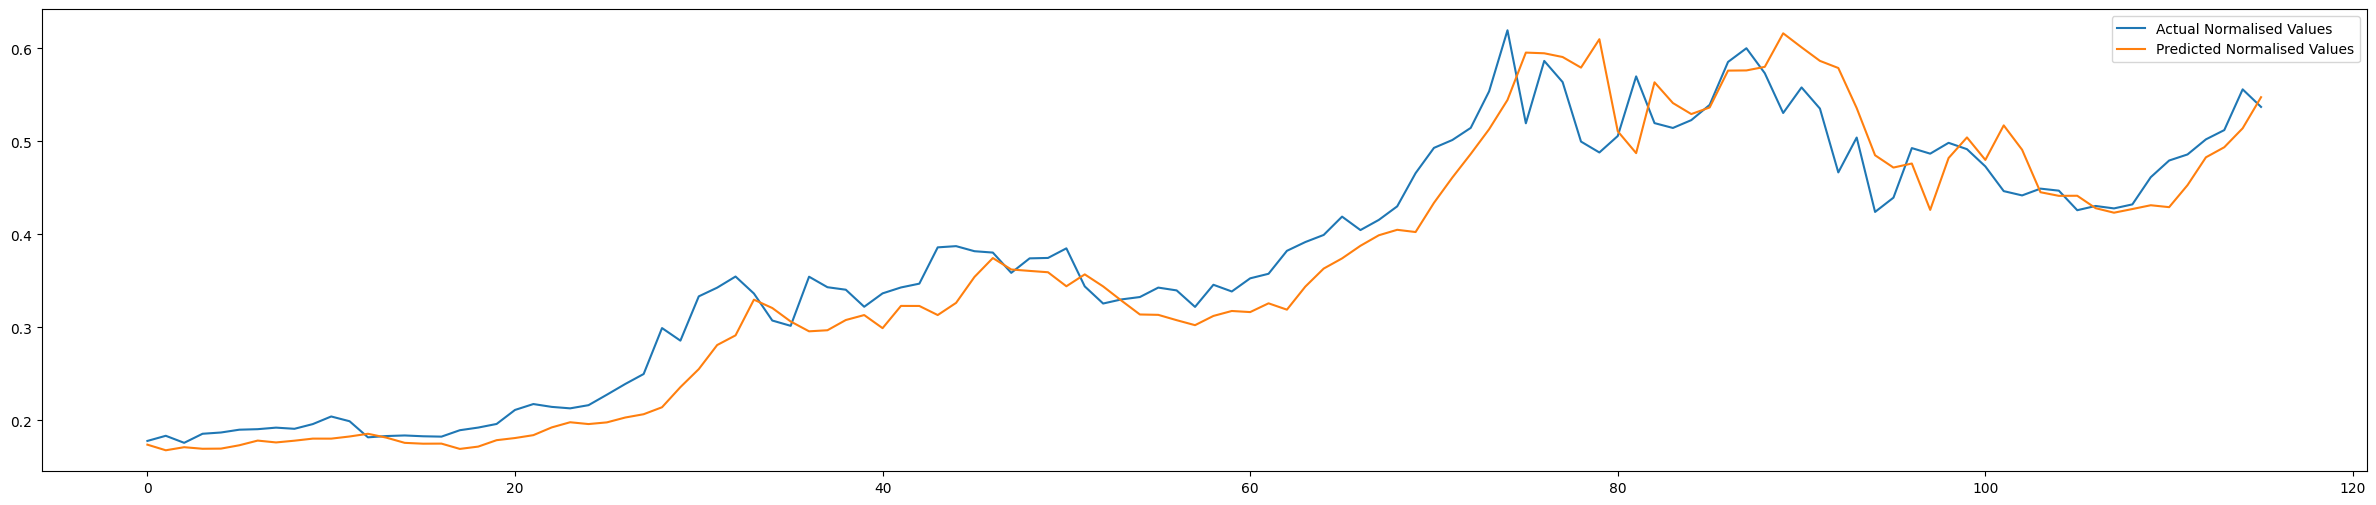

In [96]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Jaya)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [97]:
denormalized_preds_Jaya = denormalize(preds_Jaya)
# print(denormalized_preds)
preds1_Jaya = pd.DataFrame(denormalized_preds_Jaya)
preds1_Jaya['DATE'] = data1.index[-1*len(preds1_Jaya):]
preds1_Jaya = preds1_Jaya.set_index('DATE')
print(preds1_Jaya)

                       0
DATE                    
2019-04-14   4994.959161
2019-04-15   4887.814666
2019-04-16   4946.528194
2019-04-17   4916.718661
2019-04-18   4919.608987
...                  ...
2019-08-03   9947.234167
2019-08-04  10477.765794
2019-08-05  10670.629647
2019-08-06  11032.316344
2019-08-07  11625.316138

[116 rows x 1 columns]


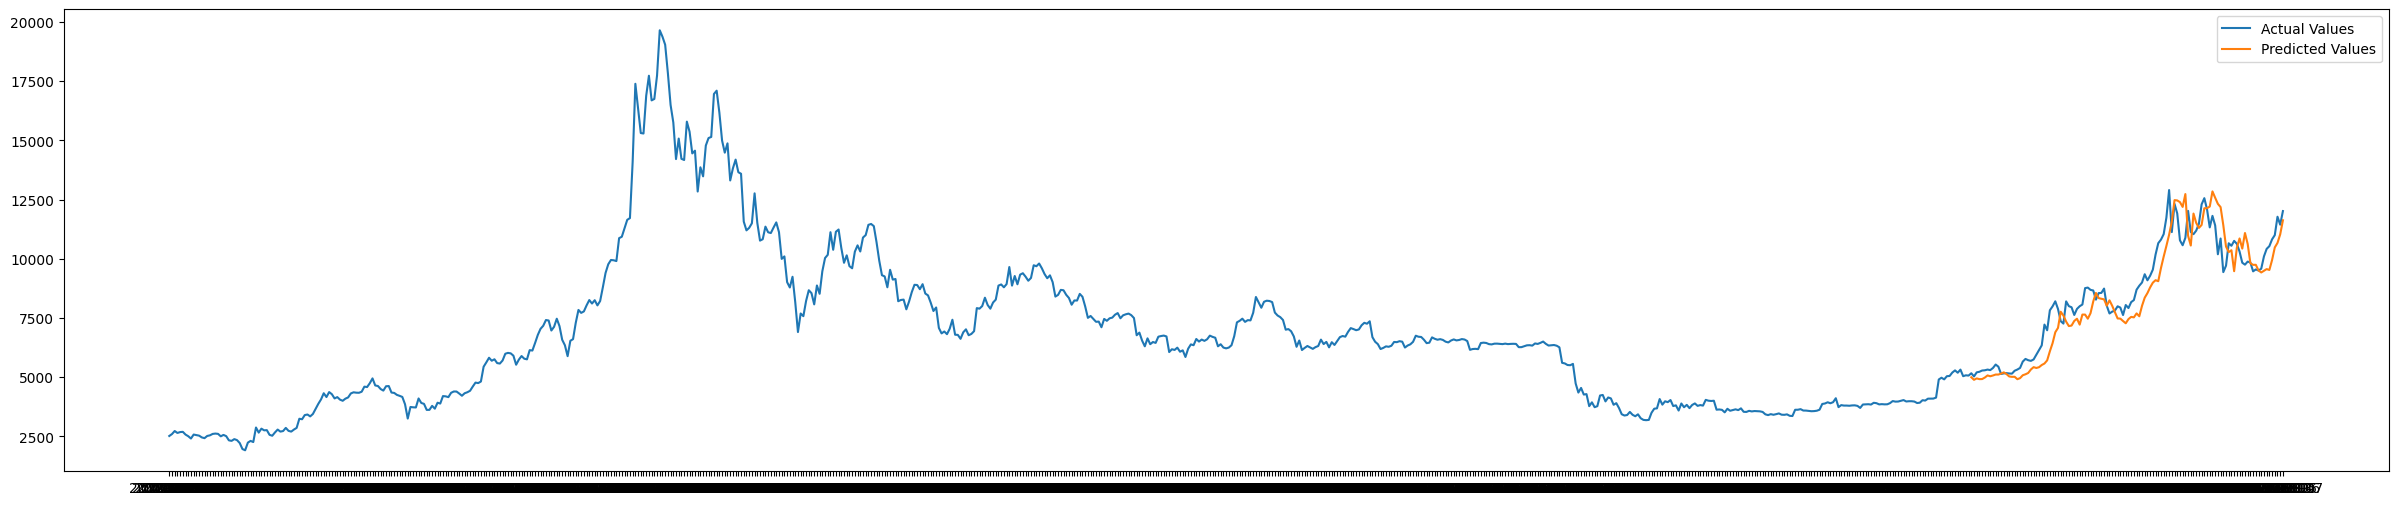

In [98]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Jaya)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [99]:
mse_Jaya = np.mean((np.array(preds1_Jaya[0]) - np.array(data1.iloc[-1*(len(preds1_Jaya)):, 0]))**2)
print("mse  "+ str(mse_Jaya))
print("rmse "+ str(np.sqrt(mse_Jaya)))

mse  685881.2245095265
rmse 828.1794639506141


In [100]:
(np.array(test_y) - np.array(preds_Jaya))[:, 0]

array([ 0.00401691,  0.01558353,  0.00470466,  0.01613177,  0.01732734,
        0.01675146,  0.01226955,  0.01592249,  0.01279069,  0.01562708,
        0.02383477,  0.01640802, -0.00382782,  0.00171119,  0.00795164,
        0.00798385,  0.00751452,  0.02011304,  0.02046328,  0.01745123,
        0.03021048,  0.03345745,  0.02207285,  0.01495124,  0.02031609,
        0.02977254,  0.0360818 ,  0.04325964,  0.08517387,  0.0499928 ,
        0.07825145,  0.06171919,  0.06327868,  0.00658533, -0.01346064,
       -0.00467569,  0.05874677,  0.04629462,  0.03259499,  0.00892603,
        0.03741089,  0.01985039,  0.02399378,  0.07281453,  0.06100894,
        0.02767356,  0.00587759, -0.00362364,  0.01350099,  0.0153857 ,
        0.04078089, -0.01292763, -0.018412  ,  0.00137243,  0.01876651,
        0.02931488,  0.03203153,  0.01965337,  0.03352275,  0.02099147,
        0.03630402,  0.03179144,  0.06329503,  0.04794484,  0.03617631,
        0.04493117,  0.01689669,  0.01653054,  0.02523374,  0.06

In [101]:
err_test_Jaya = (np.array(test_y) - np.array(preds_Jaya))[:, 0]
mse_test_Jaya = np.mean(err_test_Jaya ** 2)
rmse_test_Jaya = np.sqrt(mse_test_Jaya)
mae_test_Jaya = np.mean(np.abs(err_test_Jaya))
mape_test_Jaya = np.mean(np.abs(err_test_Jaya) / np.array(test_y)[:, 0])
EJYN = pd.DataFrame([[mse_test_Jaya, rmse_test_Jaya, mae_test_Jaya, mape_test_Jaya]], columns = ["mse", "rmse", "mae", "mape"], index = ['Jaya'])
EJYN

,mse,rmse,mae,mape
Jaya,0.001541,0.039261,0.030551,0.082716


## TAO (Teamwork Optimisation)

### Implementing the model

In [102]:
class TAO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 10
    self.weight = np.random.uniform(-0.5, 0.5, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(0, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-0.5, 0.5, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    preds = self.forward_function(self.weight, self.bias, self.beta, self.train_px)
    error = (preds - self.train_py) ** 2
    self.mse = np.mean(error, axis = 1)
    self.supervisor = np.argmin(self.mse)
    self.best_error_graph = np.array([np.min(self.mse)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, weight, bias, new_beta):
    preds = self.forward_function(weight, bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_obj = np.mean(error, axis = 1)
    cond = (new_obj < self.mse)
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.mse = np.where(cond, new_obj, self.mse)
    self.supervisor = np.argmin(self.mse)

  def optimise(self, gen):
    for i in range(gen):

      # supervisor guidance
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      S = self.beta[self.supervisor]
      new_beta = self.beta + r * (S - I * self.beta)
      self.forward_propagation(self.weight, self.bias, new_beta)

      #information sharing
      cmp_better = self.mse.T >= self.mse
      cmp_better = np.expand_dims(cmp_better, axis = [2, 3])
      cnt_better = cmp_better.sum(axis = 1)

      SB = np.tile(np.expand_dims(self.beta, axis = 0), (self.p_size, 1, 1, 1))
      # print("SB", SB.shape)
      SB = np.where(cmp_better, SB, np.zeros(SB.shape))
      SB = SB.sum(axis = 1)/cnt_better

      preds = self.forward_function(self.weight, self.bias, SB, self.train_px)
      error = (preds - self.train_py) ** 2
      S_obj = np.mean(error, axis = 1)
      SGN = np.expand_dims(np.sign(self.mse - S_obj), axis = 2)

      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      I = np.round_(r)
      beta = self.beta + r * (SB - I * self.beta) * SGN
      self.forward_propagation(self.weight, self.bias, beta)

      #individual activity
      r = np.random.random((self.p_size, self.no_hidden_nodes, 1))
      new_beta = self.beta + (-1*0.01 + r * 0.02) * self.beta
      self.forward_propagation(self.weight, self.bias, new_beta)

      # best error curve
      self.best_error_graph = np.append(self.best_error_graph, np.array([np.min(self.mse)]))



### Convergence Curve

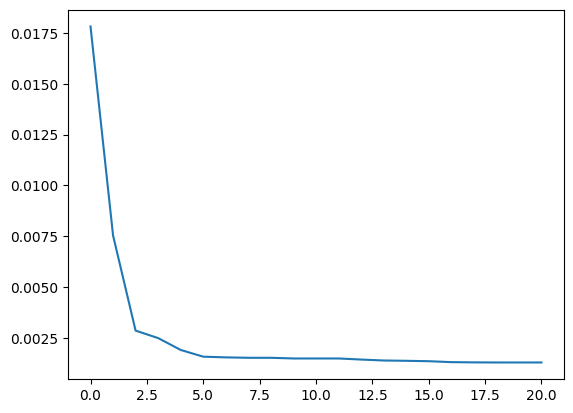

In [103]:
optimiser = TAO_ELM(2000)
optimiser.optimise(20)
ec_Tao = optimiser.best_error_graph
plt.plot(ec_Tao)
preds_train_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor],  train_x)

In [104]:
print(preds_train_Tao.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_Tao = (np.array(train_y)[:, 0] - np.array(preds_train_Tao)[:, 0])
# print(error_train)
print(np.mean((error_train_Tao) ** 2))

(655, 1)
0.0012882981340531449


### Prediction

In [105]:
preds_Tao = optimiser.forward_function(optimiser.weight[optimiser.supervisor], optimiser.bias[optimiser.supervisor], optimiser.beta[optimiser.supervisor], test_x)
print(preds_Tao.shape)
error_test_Tao = (np.array(test_y)[:, 0] - np.array(preds_Tao)[:, 0])
print(np.mean(error_test_Tao ** 2))

(116, 1)
0.001575756567720424


In [106]:
np.array(preds_Tao)[:, 0]

array([0.16991988, 0.16956473, 0.17157878, 0.17155264, 0.17060693,
       0.18105556, 0.17308318, 0.1796295 , 0.1794387 , 0.18208351,
       0.17830655, 0.18875005, 0.18651172, 0.17851391, 0.17477808,
       0.17498635, 0.16995844, 0.17238721, 0.17990202, 0.18153503,
       0.17780068, 0.19094714, 0.19878977, 0.19805153, 0.19727706,
       0.20088101, 0.20400209, 0.21138083, 0.22651547, 0.25929432,
       0.26871246, 0.28841481, 0.3254875 , 0.3285909 , 0.32832433,
       0.29461603, 0.30175157, 0.29698367, 0.33551804, 0.31849665,
       0.33191975, 0.31801344, 0.31163244, 0.30882167, 0.37799689,
       0.37746161, 0.37558431, 0.36738664, 0.36123512, 0.35258265,
       0.35410206, 0.37828552, 0.35092314, 0.31819154, 0.32039307,
       0.29912783, 0.31904928, 0.32412215, 0.32739125, 0.31358442,
       0.31895781, 0.3253682 , 0.34181129, 0.36481316, 0.38205259,
       0.37646041, 0.42005116, 0.40272797, 0.40960931, 0.42296008,
       0.46103322, 0.49595409, 0.51690134, 0.54951312, 0.56765

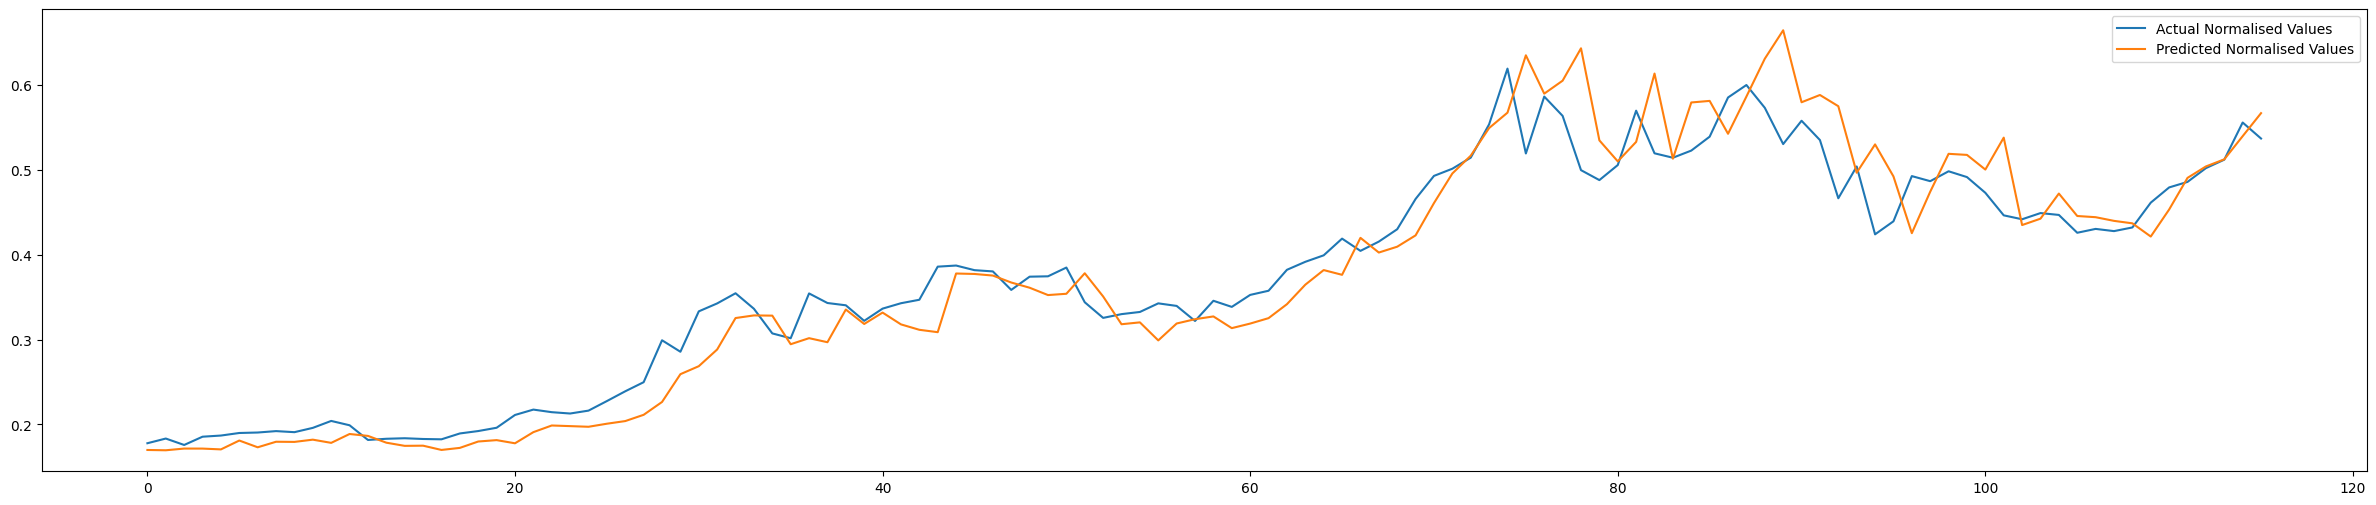

In [107]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_Tao)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [108]:
denormalized_preds_Tao = denormalize(preds_Tao)
# print(denormalized_preds)
preds1_Tao = pd.DataFrame(denormalized_preds_Tao)
preds1_Tao['DATE'] = data1.index[-1*len(preds1_Tao):]
preds1_Tao = preds1_Tao.set_index('DATE')
print(preds1_Tao)

                       0
DATE                    
2019-04-14   4925.197740
2019-04-15   4918.897365
2019-04-16   4954.627098
2019-04-17   4954.163336
2019-04-18   4937.386171
...                  ...
2019-08-03  10616.904138
2019-08-04  10856.023423
2019-08-05  11004.681481
2019-08-06  11489.368801
2019-08-07  11970.937898

[116 rows x 1 columns]


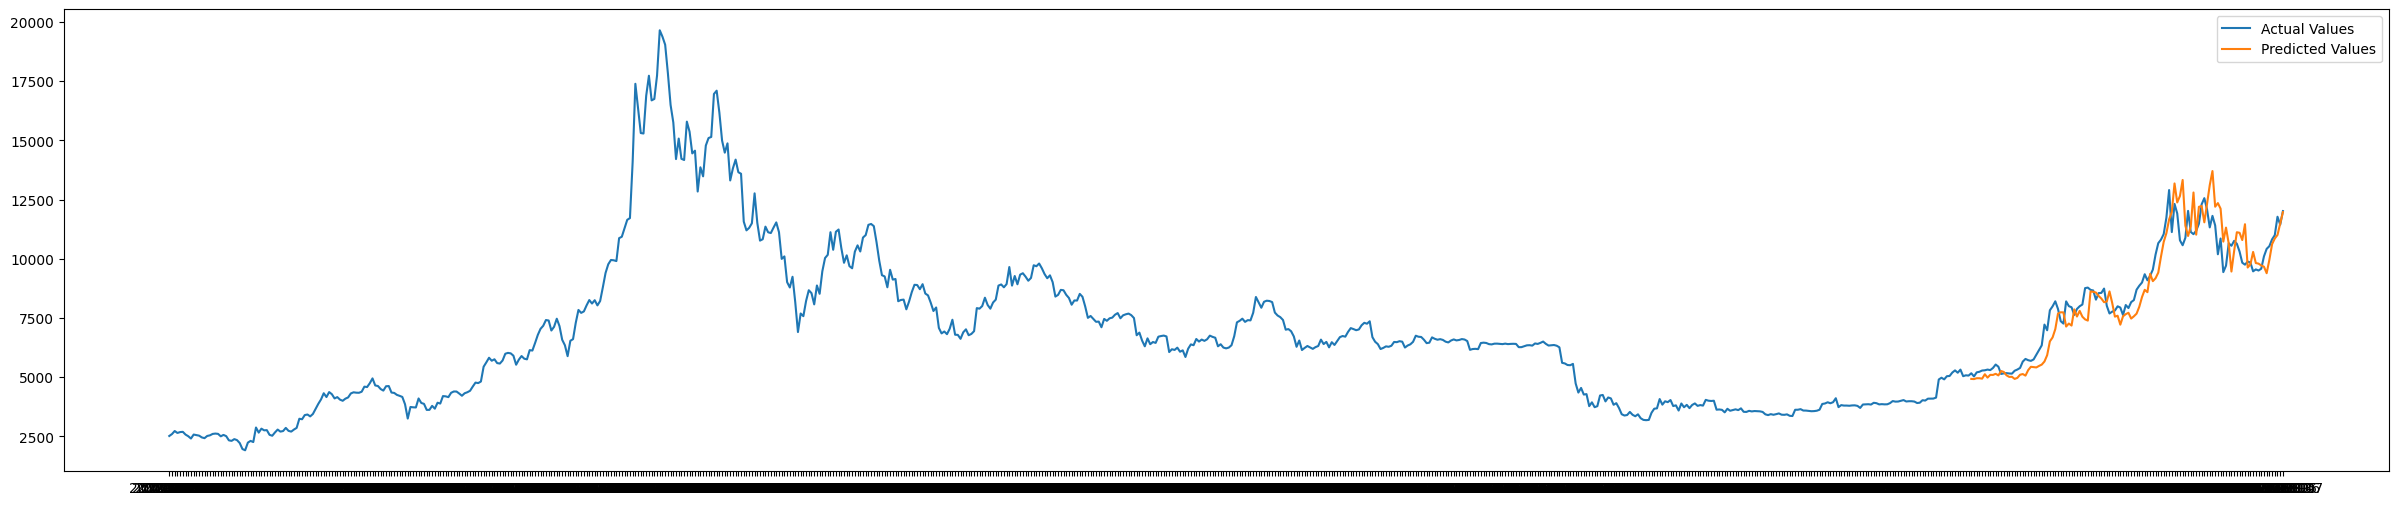

In [109]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_Tao)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [110]:
mse_Tao = np.mean((np.array(preds1_Tao[0]) - np.array(data1.iloc[-1*(len(preds1_Tao)):, 0]))**2)
print("mse  "+ str(mse_Tao))
print("rmse "+ str(np.sqrt(mse_Tao)))

mse  661910.9610039924
rmse 813.5791055601123


In [111]:
(np.array(test_y) - np.array(preds_Tao))[:, 0]

array([ 0.00794929,  0.01383142,  0.00424814,  0.01402105,  0.01632526,
        0.00889181,  0.01742055,  0.01253881,  0.0114754 ,  0.01390155,
        0.02586047,  0.01029584, -0.0047762 ,  0.00461393,  0.00897489,
        0.00788726,  0.01253469,  0.01700774,  0.01233731,  0.01458588,
        0.03339275,  0.026594  ,  0.01569899,  0.01486115,  0.01904877,
        0.02671638,  0.03513291,  0.03846711,  0.07275743,  0.02643929,
        0.06466258,  0.05431694,  0.02921703,  0.00782977, -0.02094895,
        0.00704973,  0.05276582,  0.04623398,  0.00500291,  0.00369196,
        0.00467115,  0.02494152,  0.03541098,  0.07726408,  0.00939775,
        0.00447932,  0.00489102, -0.00872219,  0.01302159,  0.02211542,
        0.03092056, -0.03419584, -0.02525206,  0.01191297,  0.01226158,
        0.04367438,  0.02073549, -0.00208235,  0.01845263,  0.02504817,
        0.0338127 ,  0.03230585,  0.04055128,  0.02698278,  0.01738811,
        0.04268241, -0.01536588,  0.01289291,  0.02058917,  0.04

In [112]:
err_test_Tao = (np.array(test_y) - np.array(preds_Tao))[:, 0]
mse_test_Tao = np.mean(err_test_Tao ** 2)
rmse_test_Tao = np.sqrt(mse_test_Tao)
mae_test_Tao = np.mean(np.abs(err_test_Tao))
mape_test_Tao = np.mean(np.abs(err_test_Tao) / np.array(test_y)[:, 0])
ETAON = pd.DataFrame([[mse_test_Tao, rmse_test_Tao, mae_test_Tao, mape_test_Tao]], columns = ["mse", "rmse", "mae", "mape"], index = ['TAON'])
ETAON

,mse,rmse,mae,mape
TAON,0.001576,0.039696,0.028363,0.075685


## HHO (Harris Hawk Optimisation)

### Implementing the model

In [113]:
class HHO_ELM():
  def __init__(self, p_size):
    self.p_size = p_size
    self.no_hidden_nodes = 5
    self.weight = np.random.uniform(-1, 1, (self.p_size, 9, self.no_hidden_nodes))
    self.bias = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes))
    self.beta = np.random.uniform(-1, 1, (self.p_size, self.no_hidden_nodes, 1))
    self.train_px = np.tile(np.expand_dims(train_x, axis = 0), (p_size, 1, 1))
    self.train_py = np.tile(np.expand_dims(train_y, axis = 0), (p_size, 1, 1))
    self.fitness = np.zeros([self.p_size, 1]) + -1 * np.Inf
    self.forward_propagation(self.beta)
    self.best_error_graph = np.array([-1 * np.max(self.fitness)])

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-1 * x))

  def forward_function(self, weight, bias, beta, X):
    a = np.matmul(X, weight)
    c = np.expand_dims(bias, axis = len(bias.shape) - 1)
    b = a + c
    return self.sigmoid(np.matmul(b, beta))

  def forward_propagation(self, new_beta):
    preds = self.forward_function(self.weight, self.bias, new_beta, self.train_px)
    error = (preds - self.train_py) ** 2
    new_fitness = -np.mean(error, axis = 1)
    cond = new_fitness > self.fitness
    self.beta = np.where(np.expand_dims(cond, axis = 1), new_beta, self.beta)
    self.fitness = np.where(cond, new_fitness, self.fitness)

    sorted_indices = np.argsort(self.fitness[:, 0])
    self.weight = self.weight[sorted_indices]
    self.bias = self.bias[sorted_indices]
    self.beta = self.beta[sorted_indices]
    self.fitness = self.fitness[sorted_indices]

  def optimise(self, gen):
    for i in range(gen):
      half_size = int(np.floor(self.p_size / 2))

      r1 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      r2 = np.random.uniform(size = (self.p_size, self.no_hidden_nodes, 1))
      A1 = 2 * r1 - 1
      C1 = 2 * r2

      C2 = self.beta.copy()
      C2[half_size:] = self.beta[0].copy()

      A2 = self.beta.copy()
      A2[:half_size] = self.beta[half_size].copy()

      new_beta = self.beta + np.abs(C1 * C2 - A1 * A2)
      new_beta[new_beta < -1] = -1
      new_beta[new_beta > 1] = 1
      self.forward_propagation(new_beta)
      # print(self.fitness[:, 0])

      self.best_error_graph = np.append(self.best_error_graph, np.array([-1 * np.max(self.fitness)]))


### Convergence Curve

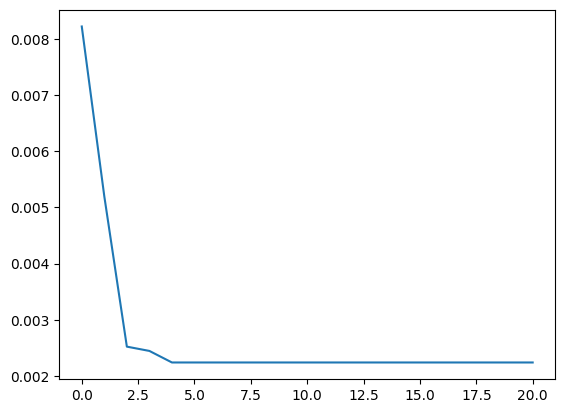

In [114]:
optimiser = HHO_ELM(2000)
optimiser.optimise(20)
ec_HHO = optimiser.best_error_graph
plt.plot(ec_HHO)
preds_train_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1],  train_x)



In [115]:
print(preds_train_HHO.shape)
# print(np.array(train_y)[:, 0])
# print(np.array(preds_train)[:, 0])
error_train_HHO = (np.array(train_y)[:, 0] - np.array(preds_train_HHO)[:, 0])
# print(error_train)
print(np.mean((error_train_HHO) ** 2))

(655, 1)
0.002240249591050427


### Prediction

In [116]:
preds_HHO = optimiser.forward_function(optimiser.weight[-1], optimiser.bias[-1], optimiser.beta[-1], test_x)
print(preds_HHO.shape)
error_test_HHO = (np.array(test_y)[:, 0] - np.array(preds_HHO)[:, 0])
print(np.mean(error_test_HHO ** 2))

(116, 1)
0.0013179610983862643


In [117]:
np.array(preds_HHO)[:, 0]

array([0.19743022, 0.20084757, 0.20201598, 0.20399659, 0.20629599,
       0.20934172, 0.20603558, 0.2080865 , 0.20796529, 0.20786746,
       0.20854584, 0.21409682, 0.21419641, 0.20792168, 0.20618417,
       0.20527877, 0.20377474, 0.20850485, 0.21353463, 0.21377349,
       0.21166708, 0.21799034, 0.22232991, 0.22110357, 0.22101509,
       0.22162207, 0.22585801, 0.23486854, 0.24635332, 0.27317691,
       0.27562488, 0.29044668, 0.31205967, 0.30815776, 0.31359653,
       0.29517002, 0.29596008, 0.32153007, 0.34038041, 0.34998249,
       0.35473135, 0.33665748, 0.33214154, 0.33454768, 0.37598161,
       0.38705336, 0.37636825, 0.37489644, 0.35637593, 0.35901395,
       0.37127731, 0.38544253, 0.3781795 , 0.35403442, 0.35102206,
       0.34062602, 0.35483983, 0.36678836, 0.35552544, 0.35181994,
       0.34255576, 0.34377069, 0.3607206 , 0.37137744, 0.38292619,
       0.38290644, 0.40119345, 0.3947263 , 0.3969403 , 0.41490059,
       0.43895197, 0.47370538, 0.49026702, 0.50523271, 0.52352

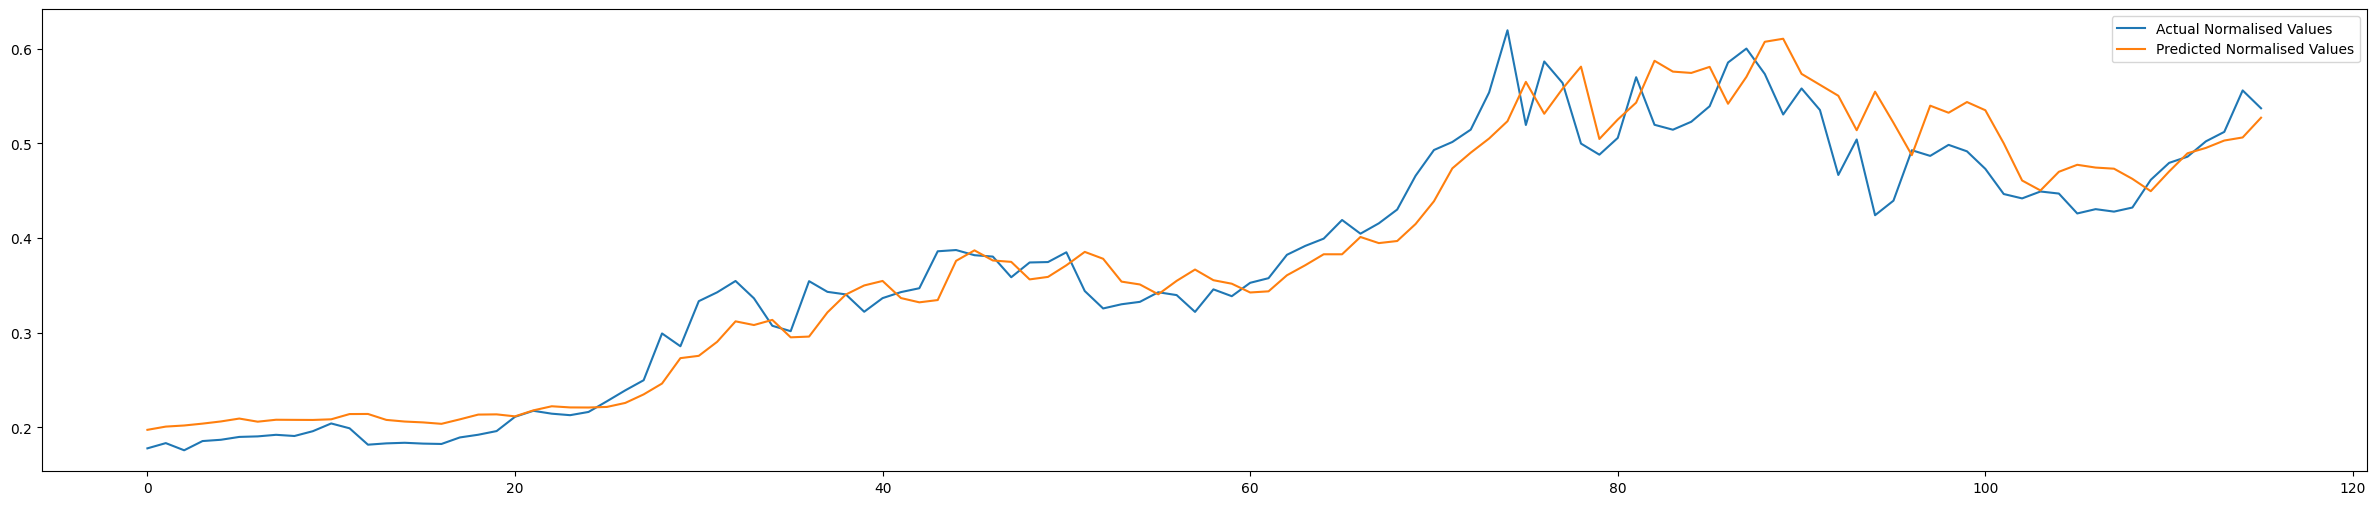

In [118]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(np.array(preds_HHO)[:, 0])
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()

In [119]:
denormalized_preds_HHO = denormalize(preds_HHO)
# print(denormalized_preds)
preds1_HHO = pd.DataFrame(denormalized_preds_HHO)
preds1_HHO['DATE'] = data1.index[-1*len(preds1_HHO):]
preds1_HHO = preds1_HHO.set_index('DATE')
print(preds1_HHO)

                       0
DATE                    
2019-04-14   5413.237555
2019-04-15   5473.862098
2019-04-16   5494.589933
2019-04-17   5529.726400
2019-04-18   5570.518232
...                  ...
2019-08-03  10597.071455
2019-08-04  10697.625290
2019-08-05  10836.005305
2019-08-06  10893.673118
2019-08-07  11263.813618

[116 rows x 1 columns]


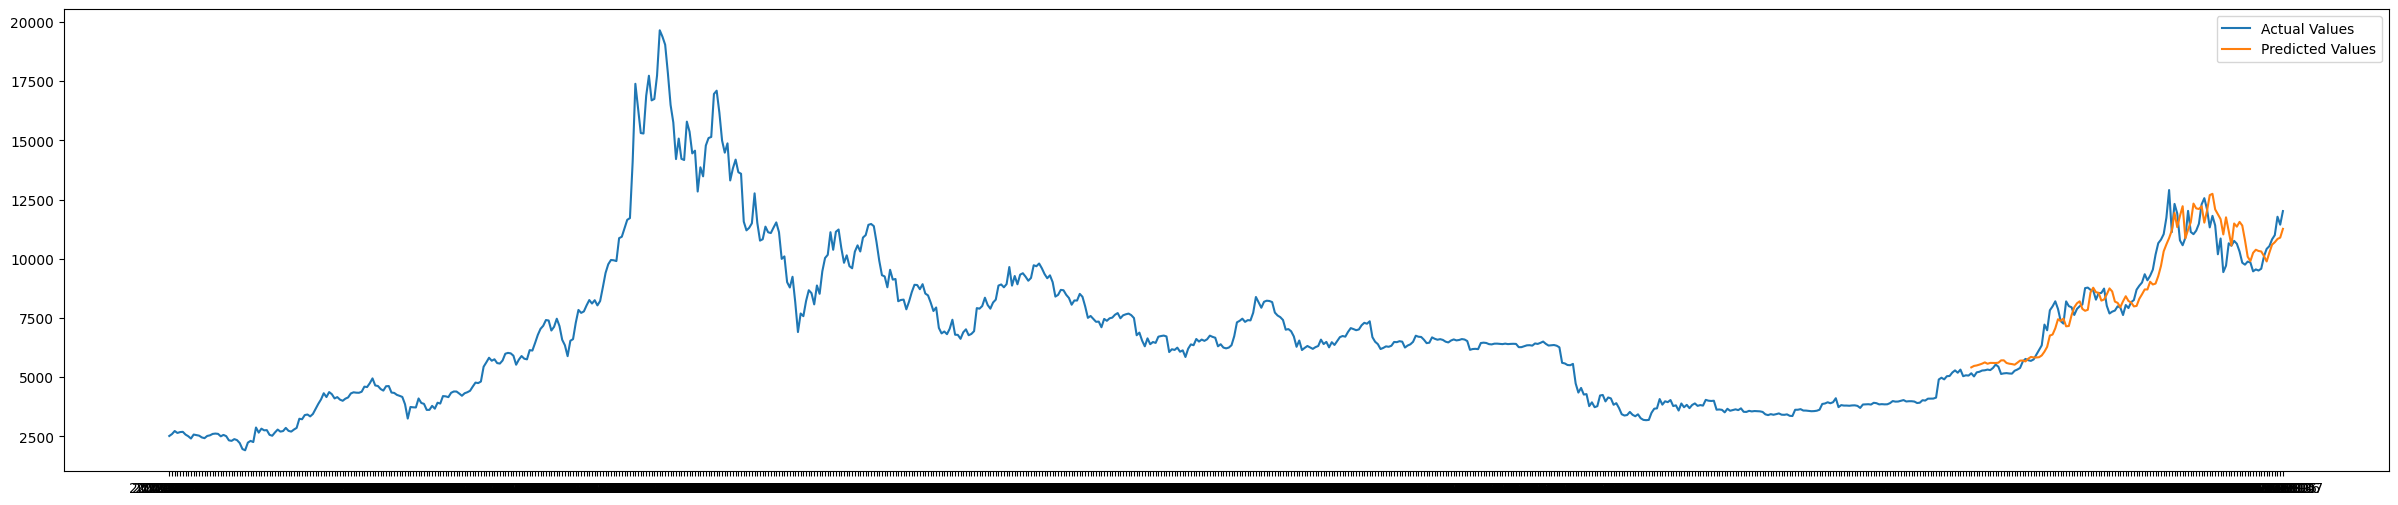

In [120]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_HHO)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

### Errors

In [121]:
mse_HHO = np.mean((np.array(preds1_HHO[0]) - np.array(data1.iloc[-1*(len(preds1_HHO)):, 0]))**2)
print("mse  "+ str(mse_HHO))
print("rmse "+ str(np.sqrt(mse_HHO)))

mse  535598.7273168699
rmse 731.8461090399196


In [122]:
(np.array(test_y) - np.array(preds_HHO))[:, 0]

array([-0.01956105, -0.01745141, -0.02618906, -0.0184229 , -0.0193638 ,
       -0.01939435, -0.01553185, -0.01591819, -0.01705119, -0.0118824 ,
       -0.00437881, -0.01505092, -0.03246089, -0.02479384, -0.02243119,
       -0.02240515, -0.02128161, -0.0191099 , -0.02129529, -0.01765259,
       -0.00047365, -0.00044919, -0.00784114, -0.00819089, -0.00468926,
        0.00597532,  0.013277  ,  0.0149794 ,  0.05291957,  0.0125567 ,
        0.05775017,  0.05228506,  0.04264486,  0.0282629 , -0.00622115,
        0.00649575,  0.0585573 ,  0.02168758,  0.00014055, -0.02779388,
       -0.01814045,  0.00629748,  0.01490188,  0.05153807,  0.01141303,
       -0.00511243,  0.00410708, -0.01623198,  0.01788077,  0.01568412,
        0.01374532, -0.04135285, -0.05250842, -0.0239299 , -0.01836741,
        0.00217619, -0.01505506, -0.04474856, -0.00968156, -0.01318735,
        0.01021475,  0.01390337,  0.02164197,  0.02041849,  0.01651452,
        0.03623638,  0.00349183,  0.02089458,  0.03325818,  0.05

In [123]:
err_test_HHO = (np.array(test_y) - np.array(preds_HHO))[:, 0]
mse_test_HHO = np.mean(err_test_HHO ** 2)
rmse_test_HHO = np.sqrt(mse_test_HHO)
mae_test_HHO = np.mean(np.abs(err_test_HHO))
mape_test_HHO = np.mean(np.abs(err_test_HHO) / np.array(test_y)[:, 0])
EHHON = pd.DataFrame([[mse_test_HHO, rmse_test_HHO, mae_test_HHO, mape_test_HHO]], columns = ["mse", "rmse", "mae", "mape"], index = ['HHO'])
EHHON

,mse,rmse,mae,mape
HHO,0.001318,0.036304,0.028125,0.075675


## Comparison Of All

### Convergence Curve

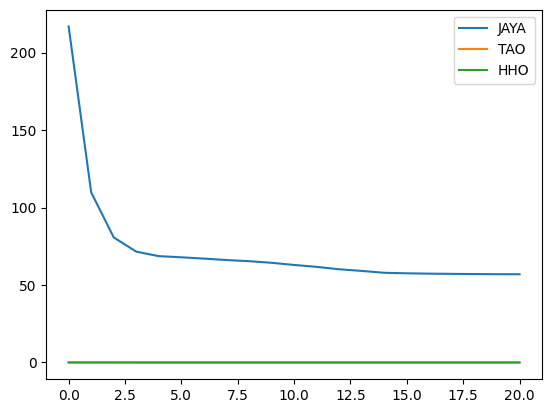

In [124]:
plt.figure()
plt.plot(ec_Jaya)
plt.plot(ec_Tao)
plt.plot(ec_HHO)
plt.legend(["JAYA", "TAO", "HHO"])
plt.show()


### Prediction

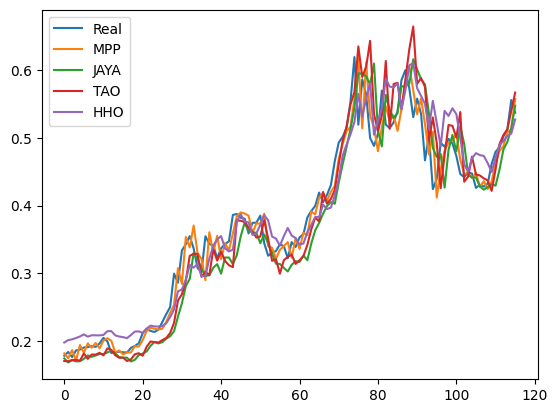

In [125]:
plt.figure()
plt.plot(np.array(test_y[9]))
plt.plot(pred_y_MPP)
plt.plot(np.array(preds_Jaya))
plt.plot(np.array(preds_Tao))
plt.plot(np.array(preds_HHO))
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

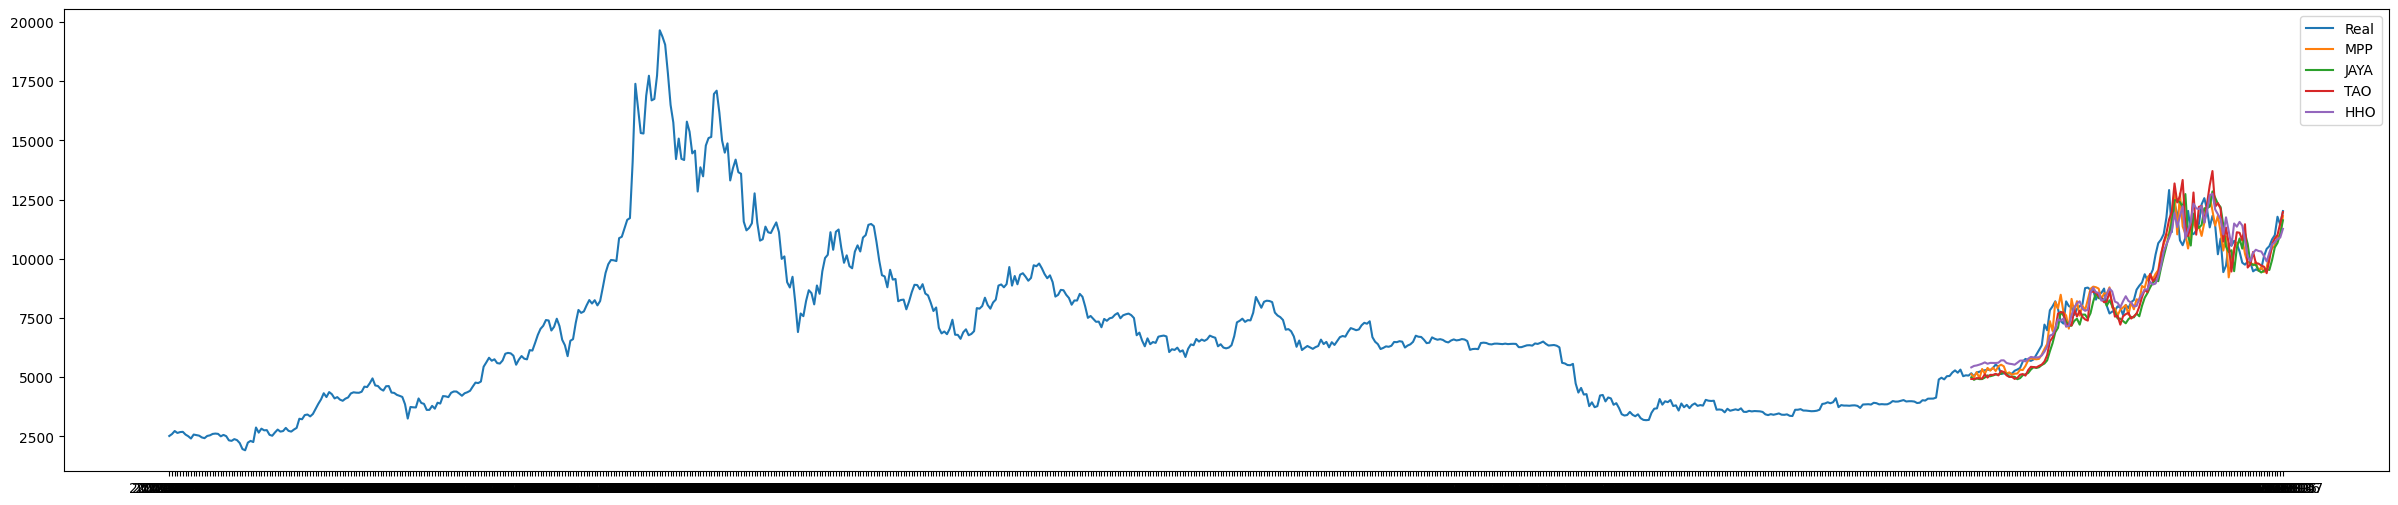

In [126]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1_MPP)
plt.plot(preds1_Jaya)
plt.plot(preds1_Tao)
plt.plot(preds1_HHO)
plt.legend(["Real", "MPP", "JAYA", "TAO", "HHO"])
plt.show()

### Errors

In [127]:
EN = pd.concat([MPPN, EJYN, ETAON, EHHON])
EN

,mse,rmse,mae,mape
MPPN,0.000682,0.026107,0.018745,0.047181
Jaya,0.001541,0.039261,0.030551,0.082716
TAON,0.001576,0.039696,0.028363,0.075685
HHO,0.001318,0.036304,0.028125,0.075675
